In [1]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # Buat stemmer
    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()

    # Buat stopword remover
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    text = stopword_remover.remove(text)

    # # Stemming
    # text = stemmer.stem(text)

    return text

In [2]:
import pandas as pd

df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df.head(500)

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
495,1000,oai:ojs.ejournal.unsrat.ac.id:article/41029,2022-07-30,Oral Manifestation of Sexual Transmitted Diseases,Abstract: Sexually transmitted diseases (STDs)...,: penyakit menular seksual (pms) merupakan inf...,Oral Manifestation of Sexual Transmitted Disea...
496,1000,oai:ojs.ejournal.unsrat.ac.id:article/41044,2022-07-30,Behavioral Changes in Cleansing Complete Dentu...,Abstract: Tooth loss experienced by elderly ca...,: kehilangan gigi yang dialami oleh lanjut usi...,Behavioral Changes in Cleansing Complete Dentu...
497,1000,oai:ojs.ejournal.unsrat.ac.id:article/41102,2022-07-27,Management of Exfoliative Cheilitis,Abstract: Cheilitis is an inflammation of the ...,: keilitis adalah adanya inflamasi pada vermil...,Management of Exfoliative Cheilitis: keilitis ...
498,1000,oai:ojs.ejournal.unsrat.ac.id:article/41279,2022-08-25,Management of Primary Tooth in Agenesis of Lat...,Abstract: Agenesis is commonly found in maxill...,: umumnya agenesis dijumpai pada gigi insisivu...,Management of Primary Tooth in Agenesis of Lat...


In [3]:
# data = df['data'].astype(str).apply(comprehensive_preprocessing).tolist()

jurnal_id = 1000

data_jid = df[df['jid']==jurnal_id]
data = data_jid['data'].astype(str).apply(comprehensive_preprocessing).tolist()
data_jid

,jid,aid,date,title,desc,abstrac_clean,data
109,1000,oai:ojs.ejournal.unsrat.ac.id:article/1923,2013-06-21,STATUS KEBERSIHAN MULUT DAN STATUS KARIES GIGI...,Abstract: Fixed orthodontic appliance are now ...,: alat ortodontik cekat saat ini sudah banyak ...,STATUS KEBERSIHAN MULUT DAN STATUS KARIES GIGI...
110,1000,oai:ojs.ejournal.unsrat.ac.id:article/1924,2013-06-21,GAMBARAN EFEK PEMBERIAN ANESTESI LOKAL DENGAN ...,Abstract: The habit of consuming alcoholic bev...,: kebiasaan mengonsumsi minuman beralkohol mem...,GAMBARAN EFEK PEMBERIAN ANESTESI LOKAL DENGAN ...
111,1000,oai:ojs.ejournal.unsrat.ac.id:article/1925,2013-06-21,GAMBARAN ORAL HABIT PADA MURID SD KATOLIK II ...,Abstract: The habit is a repeated pattern of b...,: kebiasaan merupakan suatu pola perilaku yang...,GAMBARAN ORAL HABIT PADA MURID SD KATOLIK II ...
112,1000,oai:ojs.ejournal.unsrat.ac.id:article/1926,2013-06-21,GAMBARAN PENGETAHUAN TENTANG TAMPILAN MALOKLUS...,Abstract: Malocclusion is a condition that dev...,: maloklusi merupakan keadaan yang menyimpang ...,GAMBARAN PENGETAHUAN TENTANG TAMPILAN MALOKLUS...
113,1000,oai:ojs.ejournal.unsrat.ac.id:article/1927,2013-06-21,HUBUNGAN STATUS GIZI DENGAN KEJADIAN ANGULAR C...,Abstract: Nutrition is all the intake foods th...,: gizi adalah segala asupan makanan yang diper...,HUBUNGAN STATUS GIZI DENGAN KEJADIAN ANGULAR C...
...,...,...,...,...,...,...,...
585,1000,oai:ojs.ejournal.unsrat.ac.id:article/52593,2024-03-17,Pengaruh Edukasi Tentang Pemanfaatan Teledenti...,Abstract: The government of Indonesia has issu...,: pemerintah indonesia telah mengeluarkan petu...,Pengaruh Edukasi Tentang Pemanfaatan Teledenti...
586,1000,oai:ojs.ejournal.unsrat.ac.id:article/52942,2024-02-08,Penggunaan Metode Game Interaktif untuk E...,Abstract: Visually impaired children need spec...,: anak tunanetra memerlukan pelayanan khusus s...,Penggunaan Metode Game Interaktif untuk E...
587,1000,oai:ojs.ejournal.unsrat.ac.id:article/52980,2024-03-03,Pengaruh Tingkat Keparahan Karies terhadap Keb...,Abstract: Unilateral chewing can cause tooth m...,: mengunyah satu sisi dapat menyebabkan terjad...,Pengaruh Tingkat Keparahan Karies terhadap Keb...
588,1000,oai:ojs.ejournal.unsrat.ac.id:article/54020,2024-03-16,Efektivitas Waktu Perubahan Perilaku Lanjut Us...,Abstract: Aging process brings about several p...,: bertambahnya usia akan menimbulkan beberapa ...,Efektivitas Waktu Perubahan Perilaku Lanjut Us...


In [4]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [6]:
# Tokenisasi data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [7]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [8]:
# Membuat dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [10]:
import torch

model = AutoModel.from_pretrained('bert-base-multilingual-cased')

device = 'cpu'
if torch.cuda.is_available() :
    device = 'cuda'

model.to(device)

# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

        embeddings.append(last_hidden_states.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [11]:
from sklearn.decomposition import PCA

# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [12]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

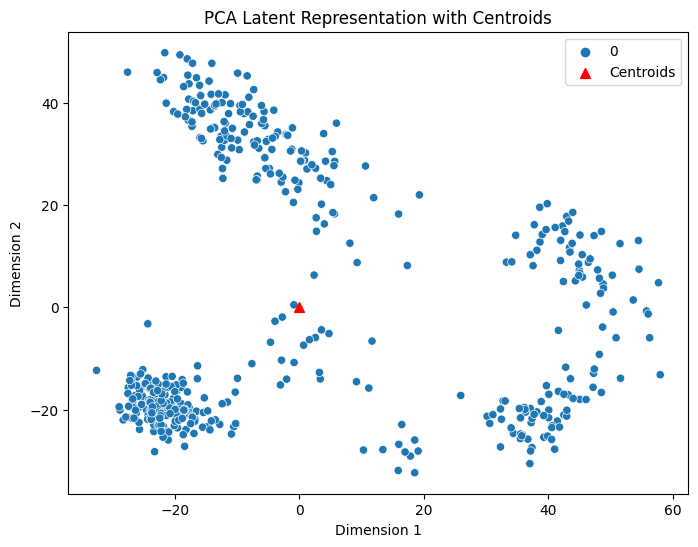

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)


In [14]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
# Misalnya, jika ingin menentukan data yang berjarak lebih dari 2 kali standar deviasi dari centroid
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

# print("Data dalam scoop:")
# print(scoop_data)

# print("\nData outscoop:")
# print(outscoop_data)

C:\Users\USER\AppData\Local\Temp\ipykernel_7096\3724749617.py:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


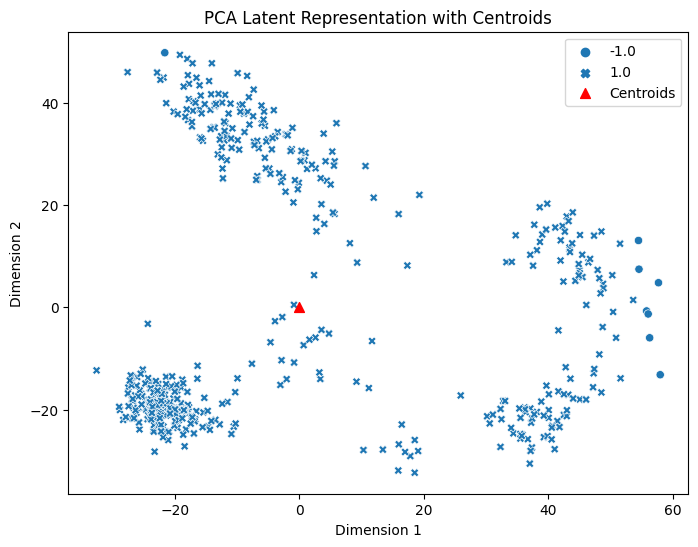

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [16]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df = pd.DataFrame({'Data': data_jid['data'].astype(str).apply(comprehensive_preprocessing),
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df[df['Label'] == 1]
outScoop_df = df[df['Label'] == -1]

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)


Data dalam scoop:
                                                  Data  Label
109  status kebersihan mulut status karies gigi mah...    1.0
110  gambaran efek pemberian anestesi lokal teknik ...    1.0
111  gambaran oral habit murid katolik antonius pal...    1.0
112  gambaran pengetahuan tampilan maloklusi siswa ...    1.0
113  hubungan status gizi kejadian angular cheiliti...    1.0
..                                                 ...    ...
585  pengaruh edukasi pemanfaatan teledentistry pen...    1.0
586  penggunaan metode game interaktif edukasi meng...    1.0
587  pengaruh tingkat keparahan karies kebiasaan me...    1.0
588  efektivitas waktu perubahan perilaku lanjut us...    1.0
589  hubungan kelemahan fisik kelemahan rongga mulu...    1.0

[473 rows x 2 columns]

Data outscoop:
                                                  Data  Label
169  pengaruh penyuluhan cara menyikat gigi indeks ...   -1.0
195  gambaran karakteristik penyebab pencabutan gig...   -1.0
204  uji kek

In [26]:
def predict_inscoop_outscoop(new_input_ids, new_attention_masks, model, pca, kmeans, centroid, threshold):
    # Embed data baru
    with torch.no_grad():
        input_ids = new_input_ids.to(device)
        attention_mask = new_attention_masks.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

    new_embedding = last_hidden_states.cpu().numpy()

    # Mengubah array embedding menjadi matriks dua dimensi
    new_embedding_flattened = new_embedding.reshape(new_embedding.shape[0], -1)

    # Transformasi menggunakan PCA yang sama
    new_embedding_pca = pca.transform(new_embedding_flattened)

    # Menghitung jarak antara data baru dan centroid
    distance_to_centroid = np.sqrt(np.sum((new_embedding_pca - centroid) ** 2))

    # Prediksi apakah data masuk inscoop atau outscoop
    if distance_to_centroid <= threshold:
        return "Inscoop"
    else:
        return "Outscoop"

new_data = [
    'gambaran efek pemberian anestesi lokal teknik blok mandibula fisher peminum alkohol kebiasaan mengonsumsi minuman beralkohol memiliki karakteristik khusus bila berhubungan obat obatan terlebih berkaitan anestesi dibanding orang tidak mengonsumsi minuman beralkohol alkohol merubah respon obat diberikan bersamaanobat anestesi alkohol mempunyai kandungan sama kandungan etereter ialah suatu zat banyak digunakan anestesi dunia kedokteran hingga inipenelitian bertujuan mengetahui gambaran pemberian efek anestesi lokal teknik blok mandibula fisher peminum minuman beralkohol juga mengetahui masa reaksi anestesi perbandingan reaksi anestesipenelitian dilakukan deskriptif non statistik pengolahan data analisisâ yangâ didasarkan data hasil observasi perlakuan kemudian dijelaskan secaraâ kualitatifdataâ diolah disajikanâ bentuk tabel diuraikan tekstualhasil penelitian perlakuanâ anestesi ekstraksi menunjukkan bahwaâ terdapat perbedaan durasi masa bereaksi dihitung injeksi pertama dengan waktu hilangnya rasa sakit saat dilakukan ekstraksibegitu terdapat perbedaan durasi waktu anestesi dilakukan area bibir lidah mukosa bukal mukosa lingual berdasarkan jumlah alkohol diminum kandungan kadar alkohol'
            ]   
# Contoh penggunaan fungsi predict_inscoop_outscoop dengan data baru
new_input_ids, new_attention_masks = tokenize_data(new_data, tokenizer)  # Tokenisasi data baru
threshold = outscoop_threshold
predicted_label = predict_inscoop_outscoop(new_input_ids, new_attention_masks, model, pca, kmeans, centroid, threshold)
print("Predicted Label:", predicted_label)


c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicted Label: Inscoop
